In [1]:
%matplotlib inline

import os

import scipy

import numpy as np
from scipy import io

from skimage import *
from skimage import io
from skimage.morphology import *
from skimage.segmentation import *
from skimage.color import *
import skimage
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage import measure
from skimage import exposure
from scipy.stats import linregress
from scipy.optimize import minimize

skimage.__version__
scipy.__version__

'0.14.1'

In [2]:
THRESHOLD=3.5*10**(-6)
MAX_SLICE = 65
MIN_SLICE = 11
X_SLICE = 132
Y_SLICE = 108
INVERTED = False

In [3]:
mat3 = scipy.io.loadmat('e3.mat')
e3 = mat3['e3']
if INVERTED:
    e3 = e3[:,:,::-1]

/home/shido/.local/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


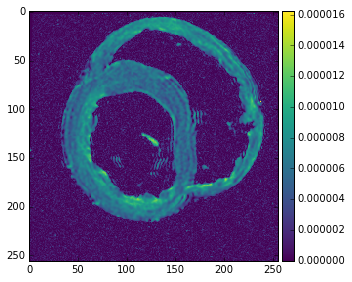

In [4]:
io.imshow(e3[:,:,76])

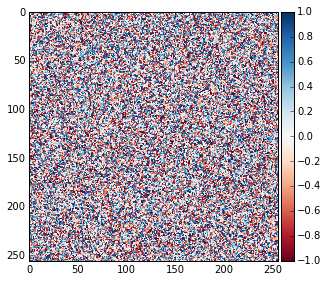

(array([  4099.,   4895.,   5283.,   5446.,   5632.,   5724.,   5897.,
          6011.,   6036.,   6066.,   5952.,   6182.,   6257.,   6329.,
          6583.,   6353.,   6344.,   6640.,   6399.,   6554.,   6639.,
          6504.,   6425.,   6570.,   6608.,   6781.,   6587.,   6711.,
          6798.,   6722.,   6703.,   6870.,   6836.,   6946.,   6961.,
          6807.,   6946.,   6857.,   6899.,   6964.,   6886.,   6900.,
          6958.,   6931.,   6877.,   7017.,   7091.,   7131.,   7091.,
          7065.,   7147.,   7062.,   7010.,   7164.,   7085.,   7103.,
          7165.,   7223.,   7200.,   6942.,   7161.,   7273.,   7033.,
          7230.,   7388.,   7165.,   7169.,   7212.,   7189.,   7187.,
          7108.,   7333.,   7097.,   7258.,   7309.,   7268.,   7236.,
          7291.,   7227.,   7426.,   7363.,   7353.,   7406.,   7439.,
          7366.,   7343.,   7286.,   7275.,   7271.,   7372.,   7409.,
          7442.,   7394.,   7424.,   7436.,   7375.,   7421.,   7361.,
      

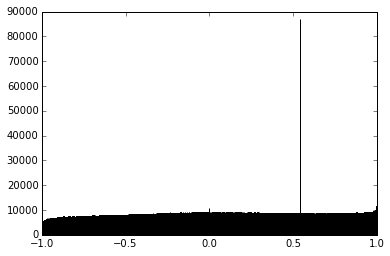

In [5]:
v_arr = scipy.io.loadmat('v13.mat')['v13']
io.imshow(v_arr[:,:,5])
io.show()
plt.hist(v_arr.ravel(), bins=1000)

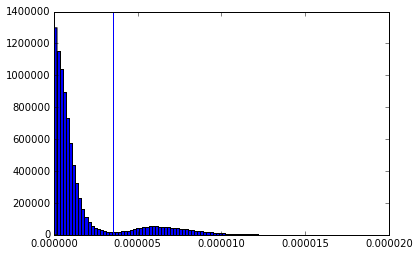

In [6]:
plt.hist(e3.ravel(), bins=100)
plt.axvline(x=THRESHOLD)

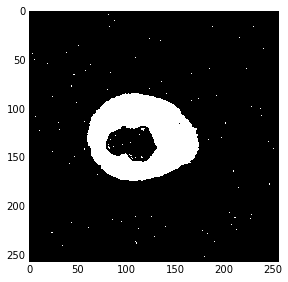

In [7]:
io.imshow(np.greater(e3[:,:,23], THRESHOLD))

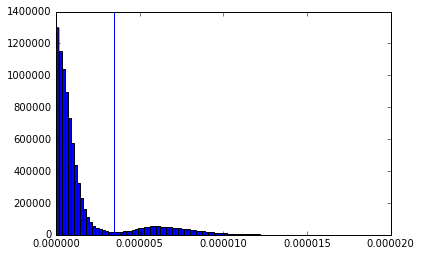

In [167]:
plt.hist(e3.ravel(), bins=100)
plt.axvline(x=THRESHOLD)

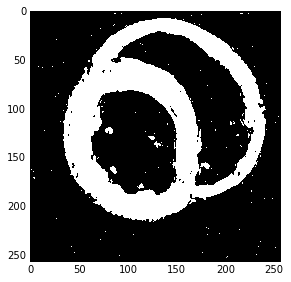

In [168]:
img_init = np.greater(e3[:,:,73], THRESHOLD)
io.imshow(img_init)

In [169]:
 img_init = np.greater(e3[:,:,73], THRESHOLD)

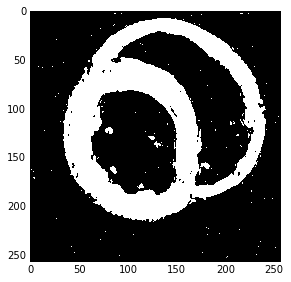

In [170]:
io.imshow(img_init)

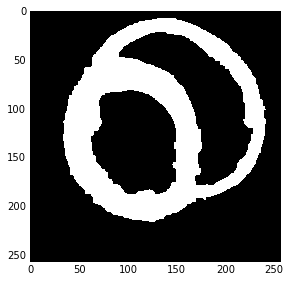

In [171]:
img = morphology.remove_small_objects(img_init, 400)
img = morphology.dilation(img, square(5))
img = morphology.erosion(img, square(5))
io.imshow(img)


/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


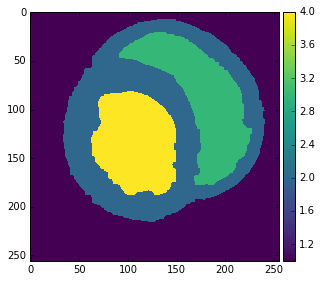

In [172]:
io.imshow(label(img, background=-1))

In [173]:
def dtmri_clean(img_init, N=5, clean_zones=400, disk_=False):
    template = square(N) if not disk_ else disk(N//2)
    img = morphology.remove_small_objects(img_init, clean_zones)
    img = morphology.dilation(img, template)
    img = morphology.remove_small_holes(img, clean_zones)
    return morphology.erosion(img, template)

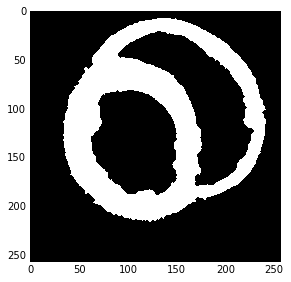

In [174]:
img = dtmri_clean(img_init, disk_=True)
io.imshow(img)

/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


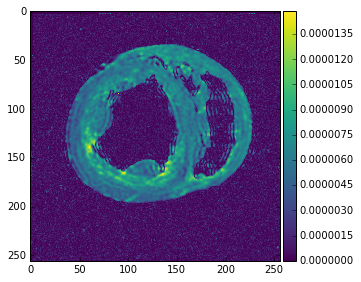

In [175]:
io.imshow(e3[:,:,50])

/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


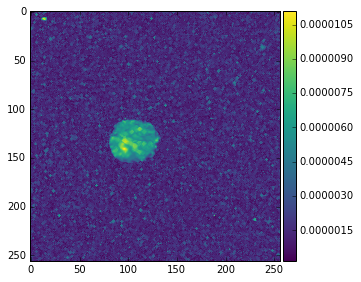

In [176]:
img = dilation(e3)
io.imshow(img[:,:,13])

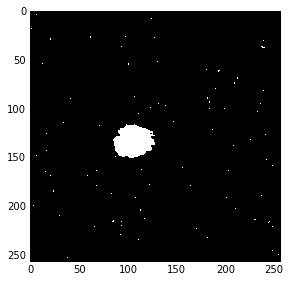

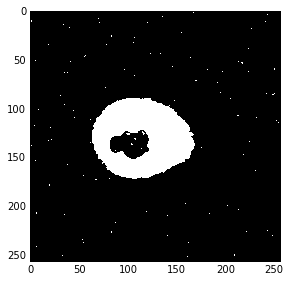

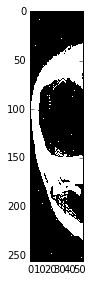

In [177]:
mat3 = scipy.io.loadmat('e3.mat')
e3 = mat3['e3']
if INVERTED:
    e3 = e3[:,:,::-1]
img_init = np.greater(e3, THRESHOLD)
io.imshow(img_init[:,:,13])
io.show()
io.imshow(img_init[:,:,21])
io.show()
io.imshow(img_init[130,:,MIN_SLICE:MAX_SLICE])
img_init = np.greater(e3[:,:,MIN_SLICE:MAX_SLICE], THRESHOLD)

In [178]:
def dtmri_clean_3D(img_init, N=4, clean_zones=1000, ball_=False):
    template = cube(N) if not ball_ else ball(N//2)
    img = morphology.remove_small_objects(img_init, clean_zones)
    img = morphology.dilation(img, template)
    img = morphology.remove_small_holes(img, clean_zones)
    return morphology.erosion(img, template)

In [179]:
def dtmri_segmentation_3D(image):
    img_morph_label_ = label(image, background = -1)
    background = img_morph_label_[0][0][0]
    img_morph_label = label(img_morph_label_, background = background)
    
    return np.equal(img_morph_label, 1), np.equal(img_morph_label, 3), np.equal(img_morph_label, 2)

In [180]:
def show_with_point(image):
    point = np.zeros((256,256))
    point[X_SLICE,] = 70
    point[:,Y_SLICE] = 70
    with_point = image*5 + point
    io.imshow(with_point)
    io.show()

/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


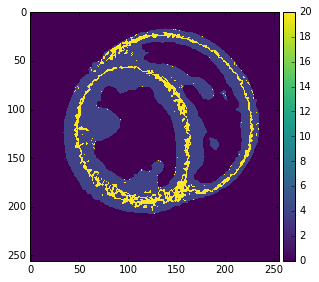

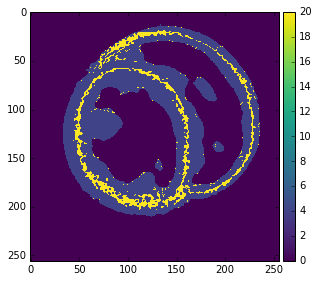

In [183]:
v_arr = scipy.io.loadmat('v13.mat')['v13'][:,:,MIN_SLICE:MAX_SLICE]
img = dtmri_clean_3D(img_init)
wall, lv, rv = dtmri_segmentation_3D(img)
oops = np.logical_and(np.less(np.abs(v_arr), 0.1), img)*4 + wall
io.imshow(oops[:,:,50]*4)
io.show()
io.imshow(oops[:,:,53]*4)
io.show()

/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


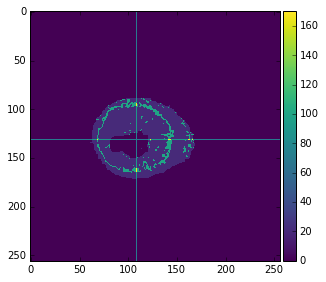

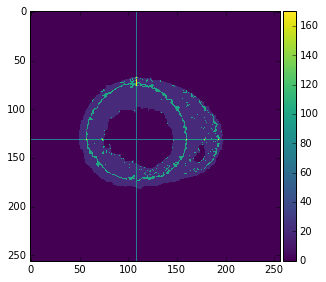

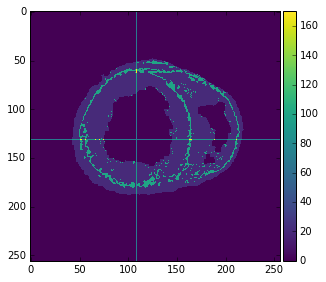

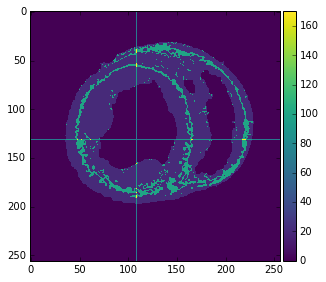

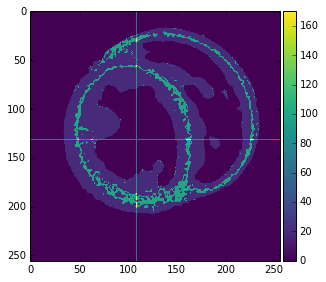

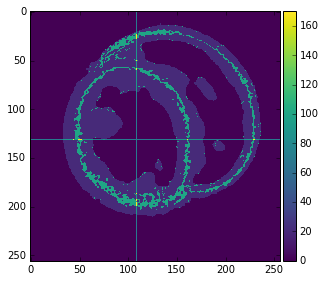

In [182]:
v_arr = scipy.io.loadmat('v13.mat')['v13'][:,:,MIN_SLICE:MAX_SLICE]
img = dtmri_clean_3D(img_init)
wall, lv, rv = dtmri_segmentation_3D(img)
oops = np.logical_and(np.less(np.abs(v_arr), 0.1), img)*4 + wall
for i in range(MIN_SLICE, 10):
    show_with_point(oops[:,:,i]*4)
for i in range(10, MAX_SLICE-MIN_SLICE, 10):
    show_with_point(oops[:,:,i]*4)
show_with_point(oops[:,:,MAX_SLICE-1-MIN_SLICE]*4)
#plt.hist(v_arr.ravel(), bins=1000)

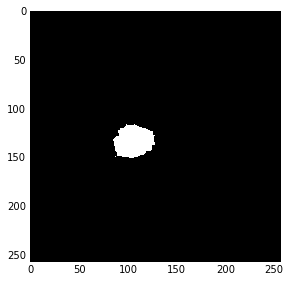

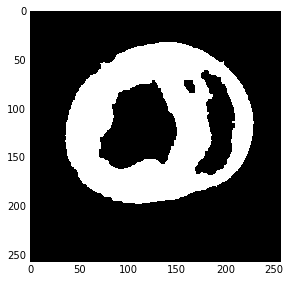

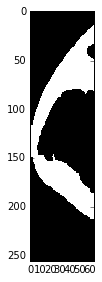

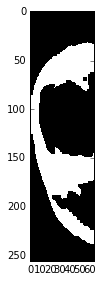

In [159]:
img = dtmri_clean_3D(img_init)
wall, lv, rv = dtmri_segmentation_3D(img)
io.imshow(wall[:,:,1])
io.show()
io.imshow(wall[:,:,40])
io.show()
io.imshow(wall[:,100,:])
io.show()
io.imshow(wall[130,:,:])
io.show()

4259840 4259840
815875


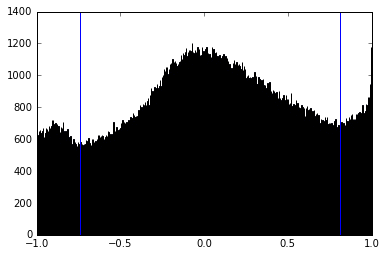

In [160]:
temp_ = wall.ravel()
temp_2 = scipy.io.loadmat('v13.mat')['v13'][:,:,MIN_SLICE:MAX_SLICE].ravel()
wall_indices = np.where(temp_ == True)
print(len(temp_), len(temp_2))
masked_z = temp_2[wall_indices]
print(len(masked_z))
plt.hist(masked_z.ravel(), bins=1000)
plt.axvline(x=0.81)
plt.axvline(x=-0.74)

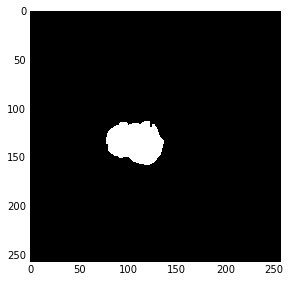

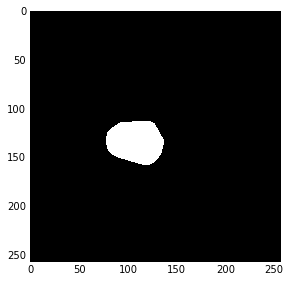

In [112]:
lv_ = morphology.convex_hull_image(lv[:,:,14])

io.imshow(lv[:,:,14])
io.show()
io.imshow(lv_)

In [ ]:
lv_convex = np.zeros((len(lv),len(lv[0]),len(lv[0][0])))

for i in range(0, len(lv[0][0])):
    if np.sum(lv[:,:,i]) > 1:
        lv_convex[:,:,i] = morphology.convex_hull_image(lv[:,:,i])
    else:
        lv_convex[:,:,i] = lv[:,:,i]
        
wall_convex = np.logical_and(wall, np.logical_not(lv_convex))

lv_convex_label = label(lv_convex, background=0)
wall_convex_label = label(wall_convex, background=0)

In [ ]:
io.imshow(lv_convex_label[:,:,30])
io.show()
io.imshow(wall_convex[:,:,30])
io.show()
io.imshow(wall_convex[130,:,:])
io.show()
io.imshow(wall_convex[:,100,:])
io.show()

In [ ]:
io.imshow(wall[:,:,50])
io.show()
io.imshow(wall_convex[:,:,50])

io.show()

In [ ]:
io.imshow(wall[:,:,60])
io.show()
io.imshow(wall_convex[:,:,60])
io.show()

In [183]:
centroids_x = []
centroids_y = []
centroids_z = []

for i in range(0, len(lv_convex_label[0][0])):
    regions = measure.regionprops(lv_convex_label[:,:,i])
    if len(regions)>0:
        x_,y_ = regions[0].centroid
        z_ = i
        centroids_x.append(x_)
        centroids_y.append(y_)
        centroids_z.append(z_*2.27)

print(int(np.mean(centroids_x)))
print(int(np.mean(centroids_y)))

centroids_x = np.array(centroids_x)
centroids_y = np.array(centroids_y)
centroids_z = np.array(centroids_z)

print(centroids_x)
print(centroids_y)
print(centroids_z)

154
88
[ 171.140625    171.05882353  171.49152542  170.99592944  170.42473118
  170.46638655  169.62316716  169.10960671  168.24332007  167.31293532
  166.27280939  165.08004926  163.69264869  162.68241835  161.70545694
  160.29767726  159.10641357  157.83799033  156.9         156.09041367
  155.34988124  154.40122061  153.86050054  152.81899418  151.79301997
  150.87085447  150.07386036  149.30801131  148.98061871  147.80122988
  147.56052443  147.28619529  146.8714662   146.41188702  146.08605646
  145.78855975  145.46626385  145.71512016  145.70656499  145.9870343
  146.24539474  146.58545752  147.26109187  147.12755185  147.12190813
  146.90772705  146.84695539  147.19714145  147.24257508  147.69723241
  148.66418793  149.60116001  149.88830508  150.07741826  150.35997279
  151.23642612  151.66718669  151.55435728  151.42007949  151.73657601
  151.77847222  151.57428671  151.49650716  151.19053419  151.07708443
  151.15093333]
[ 83.87890625  84.81900452  85.61525424  85.2550882   8

/Users/elena/anaconda/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


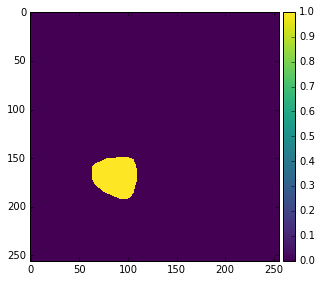

(169.10960670535138, 87.896196002578989)

In [184]:
io.imshow(lv_convex_label[:,:,7])
io.show()
measure.regionprops(lv_convex_label[:,:,7])[0].centroid

-0.145709676175 164.876660371


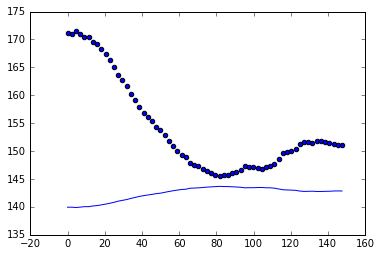

In [185]:
slope, intercept = linregress(centroids_z,centroids_x)[0:2]
print(slope, intercept)
plt.plot(centroids_z, slope*centroids_x + intercept)
plt.scatter(centroids_z,centroids_x)

-0.0159743520526 90.0400014707


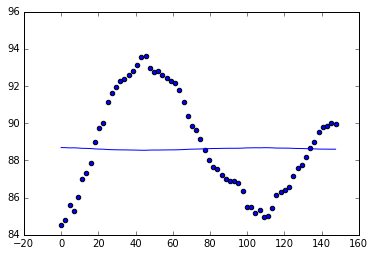

In [149]:
slope, intercept = linregress(centroids_z,centroids_y)[0:2]
print(slope, intercept)
plt.plot(centroids_z, slope*centroids_y + intercept)
plt.scatter(centroids_z,centroids_y)

In [150]:
ololo_x = centroids_z - centroids_z[0]
ololo_y = centroids_x
intercept = ololo_y[0]

def curve(slope):
    return np.linalg.norm(ololo_y - (slope*ololo_x + intercept))

slope1 = slope = minimize(curve, 0.0, method='L-BFGS-B').x[0]

print np.rad2deg(np.arctan(slope)), intercept

plt.plot(ololo_x, slope*ololo_x+ intercept)
plt.scatter(ololo_x,ololo_y)

SyntaxError: invalid syntax (<ipython-input-150-bb1896e4da0e>, line 10)

In [ ]:
ololo_x = centroids_z - centroids_z[0]
ololo_y = centroids_y
intercept = ololo_y[0]

def curve(slope):
    return np.linalg.norm(ololo_y - (slope*ololo_x + intercept))

slope2 = slope = minimize(curve, 0.0, method='L-BFGS-B').x[0]

print np.rad2deg(np.arctan(slope)), intercept

plt.plot(ololo_x, slope*ololo_x+ intercept)
plt.scatter(ololo_x,ololo_y)

In [ ]:
vector = np.array([slope1*1.0, slope2*1.0, 1.0]) / np.linalg.norm([slope1*1.0, slope2*1.0, 1.0])
vector

In [ ]:
v1 = scipy.io.loadmat('v11.mat')['v11'][:,:,11:80].ravel()
v2 = scipy.io.loadmat('v12.mat')['v12'][:,:,11:80].ravel()
v3 = scipy.io.loadmat('v13.mat')['v13'][:,:,11:80].ravel()

pairs = np.transpose([v1,v2,v3])
pairs

In [ ]:
temp_ = wall.ravel()
temp_2 = pairs
wall_indices = np.where(temp_ == True)
print len(temp_), len(temp_2)
temp_2 = temp_2[wall_indices]
print len(temp_2), temp_2

In [ ]:
proj = np.linalg.norm(vector*temp_2, axis=1)
print proj
plt.hist(proj.ravel(), bins=1000)

In [ ]:
v1 = scipy.io.loadmat('v11.mat')['v11'][:,:,50].ravel()
v2 = scipy.io.loadmat('v12.mat')['v12'][:,:,50].ravel()
v3 = scipy.io.loadmat('v13.mat')['v13'][:,:,50].ravel()

pairs = np.transpose([v1,v2,v3])
pairs